In [87]:
import torch
import torch
import sys
import os
# sys.path.insert(0, os.path.abspath('../src/pretrained/MedViT'))
sys.path.insert(0, os.path.abspath('../'))


# from src.pretrained.MedViT.MedViT import MedViT_base as base  
# model_pth = '../saved_models/medvit_mnist__base_wt75.pt'
# from MedViT import MedViT_small as tiny

from src.pretrained.MedViT.BNN_MedViT import BNN_MedViT_base as base  
model_pth = '../outputs/bnn_medvit_base/medvit_mnist__base_wt75.pt'


In [27]:
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print(device)

cpu


In [28]:
import os
print(os.getcwd())

c:\Users\rrahman3\PhDDissertation\EUFairGAN\notebooks


In [91]:
model = base()
model.proj_head[0] = torch.nn.Linear(in_features=1024, out_features=14, bias=True)
model.to(device)

initialize_weights...


BNN_MedViT(
  (stem): Sequential(
    (0): ConvBNReLU(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
    )
    (1): ConvBNReLU(
      (conv): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
    )
    (2): ConvBNReLU(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
    )
    (3): ConvBNReLU(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace

In [94]:
model.variance.weight

Parameter containing:
tensor([[ 0.0396,  0.0349, -0.0224,  ...,  0.0038, -0.0115, -0.0328]],
       requires_grad=True)

In [47]:
model[-1]

TypeError: 'MedViT' object is not subscriptable

In [30]:
model.load_model(model_pth)
model.to(device)

c:\Users\rrahman3\PhDDissertation\EUFairGAN\src\models\base_model.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path, map_location=tor

Model loaded from ../saved_models/medvit_mnist__base_wt75.pt


MedViT(
  (stem): Sequential(
    (0): ConvBNReLU(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
    )
    (1): ConvBNReLU(
      (conv): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
    )
    (2): ConvBNReLU(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
    )
    (3): ConvBNReLU(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=Tru

In [31]:
import numpy as np

In [32]:
np.std(model.norm.weight.detach().numpy())

0.012384658

In [33]:
np.mean(model.norm.weight)

TypeError: mean() received an invalid combination of arguments - got (axis=NoneType, dtype=NoneType, out=NoneType, ), but expected one of:
 * (*, torch.dtype dtype = None)
 * (tuple of ints dim, bool keepdim = False, *, torch.dtype dtype = None)
 * (tuple of names dim, bool keepdim = False, *, torch.dtype dtype = None)


In [53]:
model.features[-1].conv.conv[7].weight.shape

torch.Size([1024, 2048, 1, 1])

In [48]:
model.features[-1].conv.conv[-2].weight.shape

torch.Size([1024, 2048, 1, 1])

In [ ]:
type(model.proj_head[0])

torch.nn.modules.linear.Linear

In [ ]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
total_params

44420322

In [ ]:
total_params = sum(p.numel() for p in model.parameters())
total_params

44420322

In [ ]:
from src.dataloader.medical_dataset import NIHChestXrayDataset
from torch.utils.data import DataLoader
dataset = NIHChestXrayDataset(
            metadata_file="../data/nihcc_chest_xray/nihcc_chest_xray_testing_samples.csv",
            image_dir="../data/nihcc_chest_xray/xray_images/",
            isTest = True
        )
dataloader = DataLoader(
    dataset,
    batch_size=16,
    shuffle=True,
    num_workers=0
)

-------------------------------------------Loading NIHCC Chest Xray dataset------------------------------------------
Index(['Unnamed: 0', 'id', 'Atelectasis', 'Cardiomegaly', 'Consolidation',
       'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax',
       'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema',
       'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding', 'subj_id',
       'Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]'],
      dtype='object')
21081


In [ ]:

with torch.no_grad():
    for image, _, labels in dataloader:
        image, labels = image.to(device), labels.to(device)
        predictions = model(image)
        print(labels.shape)
        break

torch.Size([16, 14])


In [ ]:
pred_sigmoid = torch.sigmoid(predictions)
y_pred_binary = (pred_sigmoid > 0.5).float()

In [ ]:
idx = 3
print(pred_sigmoid[idx])
print(y_pred_binary[idx])
print(labels[idx])

tensor([2.1624e-02, 6.2502e-05, 7.5915e-05, 3.2518e-01, 3.2663e-04, 7.3744e-02,
        1.5572e-03, 2.2721e-05, 1.2167e-02, 2.9708e-02, 1.3481e-04, 1.8793e-05,
        7.2437e-04, 1.5246e-03], device='mps:0')
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='mps:0')
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       device='mps:0')


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix

In [ ]:
print(labels_binary)
print(pred_binary)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
pred_binary = (pred_sigmoid.detach().cpu().numpy() > 0.5).astype(int)
labels_binary = labels.detach().cpu().numpy()

accuracy = accuracy_score(labels_binary, pred_binary)
accuracy

0.625

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming labels_binary and pred_binary are multilabel arrays
for i in range(labels_binary.shape[1]):
    y_true_label = labels_binary[:, i]
    y_pred_label = pred_binary[:, i]
    
    cm = confusion_matrix(y_true_label, y_pred_label)
    print(f"Confusion matrix for label {i}:")
    print(cm)

Confusion matrix for label 0:
[[15  0]
 [ 1  0]]
Confusion matrix for label 1:
[[15  0]
 [ 1  0]]
Confusion matrix for label 2:
[[13  0]
 [ 1  2]]
Confusion matrix for label 3:
[[13  1]
 [ 1  1]]
Confusion matrix for label 4:
[[15  1]
 [ 0  0]]
Confusion matrix for label 5:
[[16]]
Confusion matrix for label 6:
[[16]]
Confusion matrix for label 7:
[[14  0]
 [ 2  0]]
Confusion matrix for label 8:
[[14  0]
 [ 2  0]]
Confusion matrix for label 9:
[[15  0]
 [ 1  0]]
Confusion matrix for label 10:
[[15  0]
 [ 1  0]]
Confusion matrix for label 11:
[[16]]
Confusion matrix for label 12:
[[14  0]
 [ 1  1]]
Confusion matrix for label 13:
[[15  0]
 [ 1  0]]


/Users/nuha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/nuha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/nuha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
confusion_matrix(labels_binary, pred_binary)

ValueError: multilabel-indicator is not supported

In [ ]:
f1_score(labels_binary, pred_binary, average='micro')

0.36363636363636365

In [ ]:
import numpy as np
if len(np.unique(labels_binary)) == 2:
    auc = roc_auc_score(labels_binary, pred_sigmoid.detach().cpu().numpy(), multi_class='ovo')
    print(f"ROC AUC: {auc}")
else:
    print("Only one class present in y_true. Skipping AUC calculation.")



ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [ ]:
roc_auc_score(labels.detach().cpu().numpy(), pred_sigmoid.detach().cpu().numpy(), multi_class='ovo')

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [ ]:
import torch 
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm 

In [ ]:
# define loss function and optimizer
# if task == "multi-label, binary-class":
#     criterion = nn.BCEWithLogitsLoss()
# else:
#     criterion = nn.CrossEntropyLoss()

lr = 0.001
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [ ]:
from src.dataloader.medical_dataset import NIHChestXrayDataset
from torch.utils.data import DataLoader
train_dataset = NIHChestXrayDataset(
            metadata_file="../data/nihcc_chest_xray/nihcc_chest_xray_training_samples.csv",
            image_dir="../data/nihcc_chest_xray/xray_images/",
            isTest = True,
            frac = 0.10
        )
train_loader = DataLoader(
    train_dataset,
    batch_size=16,
    shuffle=True,
    num_workers=4
)

Index(['Unnamed: 0', 'id', 'Atelectasis', 'Cardiomegaly', 'Consolidation',
       'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax',
       'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema',
       'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding', 'subj_id',
       'Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]'],
      dtype='object')
7851


In [ ]:
device

device(type='mps')

In [ ]:
# train
NUM_EPOCHS = 10
for epoch in range(NUM_EPOCHS):
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0
    print('Epoch [%d/%d]'% (epoch+1, NUM_EPOCHS))
    model.train()
    for inputs, _, targets in tqdm(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        print(inputs.shape, targets.shape)
        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = model(inputs)
        print(targets[0])
        print(outputs[0])
        
        # if task == 'multi-label, binary-class':
        targets = targets.to(torch.float32)
        loss = criterion(outputs, targets)
        # else:
        #     targets = targets.squeeze().long()
        #     loss = criterion(outputs, targets)
        
        loss.backward()
        optimizer.step()

        print(loss)

Epoch [1/10]


NameError: name 'model' is not defined

### Heat Map


In [95]:
from src.dataloader.medical_dataset import NIHChestXrayDataset
import torch.utils.data as data

test_dataset = NIHChestXrayDataset(metadata_file="../data/nihcc_chest_xray/nihcc_chest_xray_testing_samples.csv",
        image_dir="../data/nihcc_chest_xray/xray_images/", 
        frac=1.0, isTest=True)

test_loader = data.DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=4)
male_test_loader = data.DataLoader(test_dataset.filter_by_gender('male'), batch_size=1, shuffle=False, num_workers=4)
female_test_loader = data.DataLoader(test_dataset.filter_by_gender('female'), batch_size=1, shuffle=False, num_workers=4)
# male_test_loader = data.DataLoader(test_dataset.filter_by_NIH_age(age_threshold, True), batch_size=32, shuffle=False, num_workers=4)
# female_test_loader = data.DataLoader(test_dataset.filter_by_NIH_age(age_threshold, False), batch_size=32, shuffle=False, num_workers=4)


-------------------------------------------Loading NIHCC Chest Xray dataset------------------------------------------
Index(['Unnamed: 0', 'id', 'Atelectasis', 'Cardiomegaly', 'Consolidation',
       'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax',
       'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema',
       'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding', 'subj_id',
       'Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]'],
      dtype='object')
21081


In [142]:
for batch, (image, labels) in enumerate(male_test_loader):
    input_image = image
    target_class = labels
    print(target_class)
    if torch.sum(target_class) == 1.0:
    # if batch == 10:
        break

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.]])
tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [141]:
torch.sum(target_class)

tensor(0.)

In [143]:
input_image.shape
print(target_class)
print(np.argmax(target_class))


tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor(2)


In [117]:
img_tensor = input_image.requires_grad_()
outputs = model(img_tensor)


In [133]:
outputs[0][0, 1]

tensor(53.3093, grad_fn=<SelectBackward0>)

In [158]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

def grad_cam(model, img_tensor, target_class, target_layer):
    model.eval()
    img_tensor = img_tensor.requires_grad_()
    outputs = model(img_tensor)
    print(outputs[0])

    
    print(f"Processing Grad-CAM for target class: {target_class}")
    
    # Get the score for the current target class
    class_score = outputs[0][0, target_class]
    print(class_score)
    model.zero_grad()

    # Backward pass to get gradients of the current target class with respect to target layer
    class_score.backward(retain_graph=True)

    # Extract the gradients from the target layer
    gradients = target_layer.weight.grad  # Adjust based on your layer type
    activations = target_layer.weight  # Adjust based on your layer type
    
    # Pool the gradients across the channels
    pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])
    
    # Weight the channels by the pooled gradients (out-of-place operation)
    weighted_activations = activations * pooled_gradients.view(1, -1, 1, 1)
    
    # Average the channels of the activations
    heatmap = torch.mean(weighted_activations, dim=1).squeeze()
    
    # Apply ReLU to only consider positive contributions
    heatmap = np.maximum(heatmap.cpu().detach().numpy(), 0)
    
    # Normalize the heatmap
    heatmap /= np.max(heatmap)
    print(heatmap.shape)
    
    heatmap = cv2.resize(heatmap, (input_image.shape[2], input_image.shape[3]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    return heatmap


In [159]:
target_class

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [161]:
target_layer = model.features[-1].conv.conv[7]  # or any other 
# target_layer = model.proj_head[0]  # or any other 
# target_layer = model.variance

heatmaps=[]
# for i in range (0, 14):
i = 6
heatmaps.append(grad_cam(model, input_image, i, target_layer))


tensor([[ -66.3346,   47.7048,   27.3430, -104.7047,  -35.1555,   -1.9188,
          240.5340,  -27.9452,   -5.7373,  -90.9868,    8.9436, -120.0858,
           28.4273,   32.8627]], grad_fn=<AddmmBackward0>)
Processing Grad-CAM for target class: 6
tensor(240.5340, grad_fn=<SelectBackward0>)
(1024,)


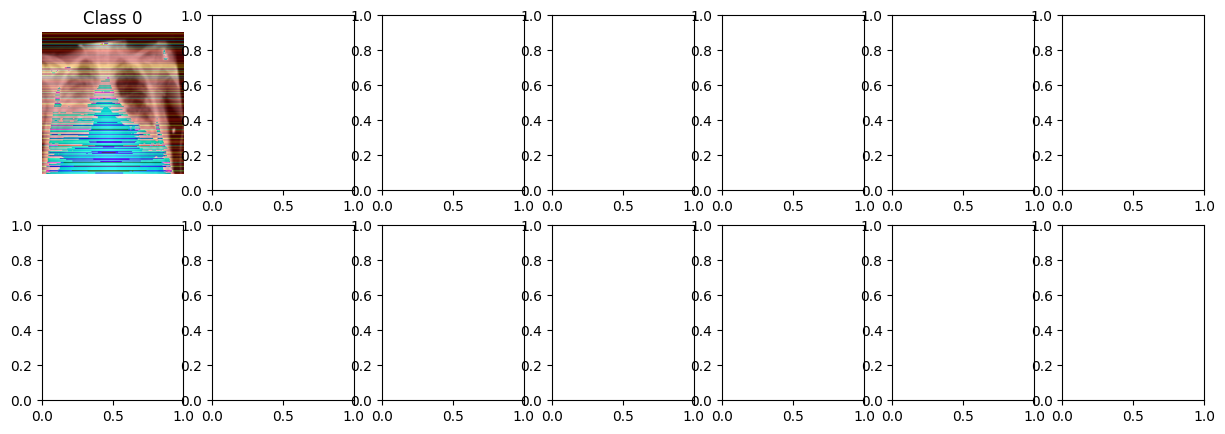

In [162]:
# Plotting all heatmaps
fig, axs = plt.subplots(2, 7, figsize=(15, 5))  # Arrange in 2 rows of 7 columns
for i, heatmap in enumerate(heatmaps):
    ax = axs[i // 7, i % 7]  # Arrange in grid

    # Convert input image to a format for visualization
    img = input_image.cpu().detach().numpy().squeeze().transpose(1, 2, 0)
    img = np.uint8(255 * (img - img.min()) / (img.max() - img.min()))  # Normalize for display

    superimposed_img = heatmap * 0.4 + img
    superimposed_img = np.uint8(superimposed_img)

    # Display the result
    ax.imshow(superimposed_img)
    # ax.imshow(heatmap, cmap='jet')
    ax.set_title(f'Class {i}')
    ax.axis('off')

plt.show()


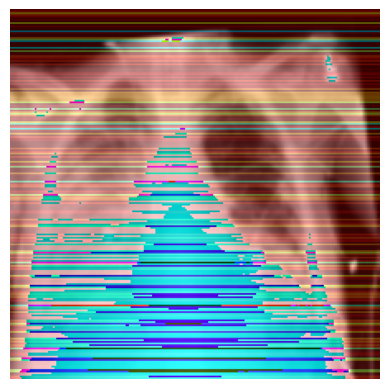

In [157]:
# Convert input image to a format for visualization
img = input_image.cpu().detach().numpy().squeeze().transpose(1, 2, 0)
img = np.uint8(255 * (img - img.min()) / (img.max() - img.min()))  # Normalize for display
heatmap = heatmaps[0]
# Superimpose heatmap onto the image
superimposed_img = heatmap * 0.4 + img
superimposed_img = np.uint8(superimposed_img)

# Display the result
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()
